Project 5 Bank scoring

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(73799, 14)

In [5]:
df.tail()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1
73798,15796,GRD,M,34,N,N,0,0,2,2,3,25000,N,0


In [6]:
df['default'].value_counts()

0    64427
1     9372
Name: default, dtype: int64

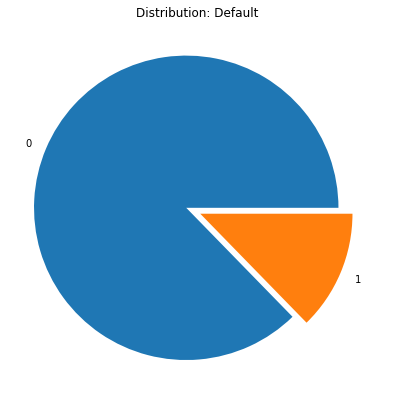

In [9]:
plt.figure(figsize=(10,7))
plt.title('Distribution: Default')
plt.pie(df['default'].value_counts(), labels = ['0', '1'], explode=[0.08, 0.02])
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [11]:
df.isna().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

<AxesSubplot:>

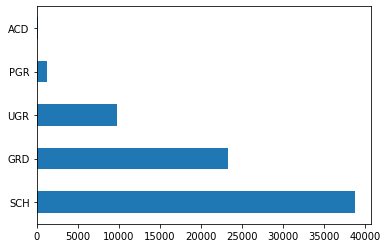

In [12]:
df['education'].value_counts().plot.barh()

In [ ]:
# заполним пропуски по образованию


In [14]:
# разделим данные на трейн и тест дата сеты
data = pd.read_csv('train.csv')
train, validation = train_test_split(data, test_size=0.33, random_state=42)

In [27]:
#бинарные переменные 
bin_cols = ['sex', 'car', 'car_type', 'good_work', 'foreign_passport']

#категориальные переменные
cat_cols = ['education', 'work_address', 'home_address']

#числовые переменные

num_cols = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']

C:\Users\home_study\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


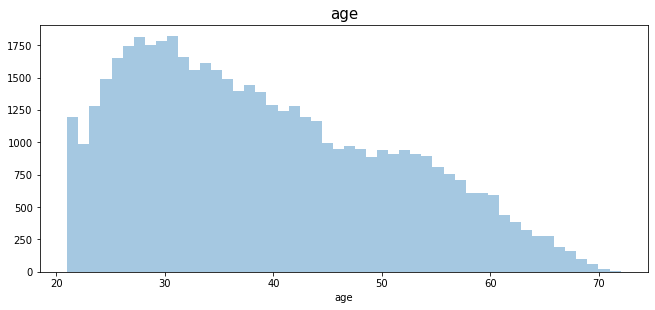

C:\Users\home_study\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


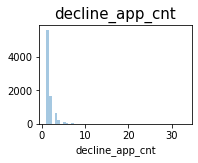

C:\Users\home_study\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


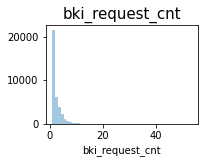

C:\Users\home_study\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


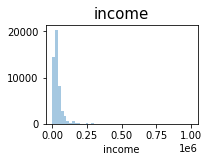

In [25]:
# построим график распределения числовых переменных

# for i in num_cols:
#     plt.figure()
#     sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
#     plt.title(i)
#     plt.show()
    
    
plt.figure(figsize=(24,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    plt.title(col, fontsize=15)
    sns.distplot(train[col][train[col] > 0].dropna(), kde = False, rug=False)
    plt.show();

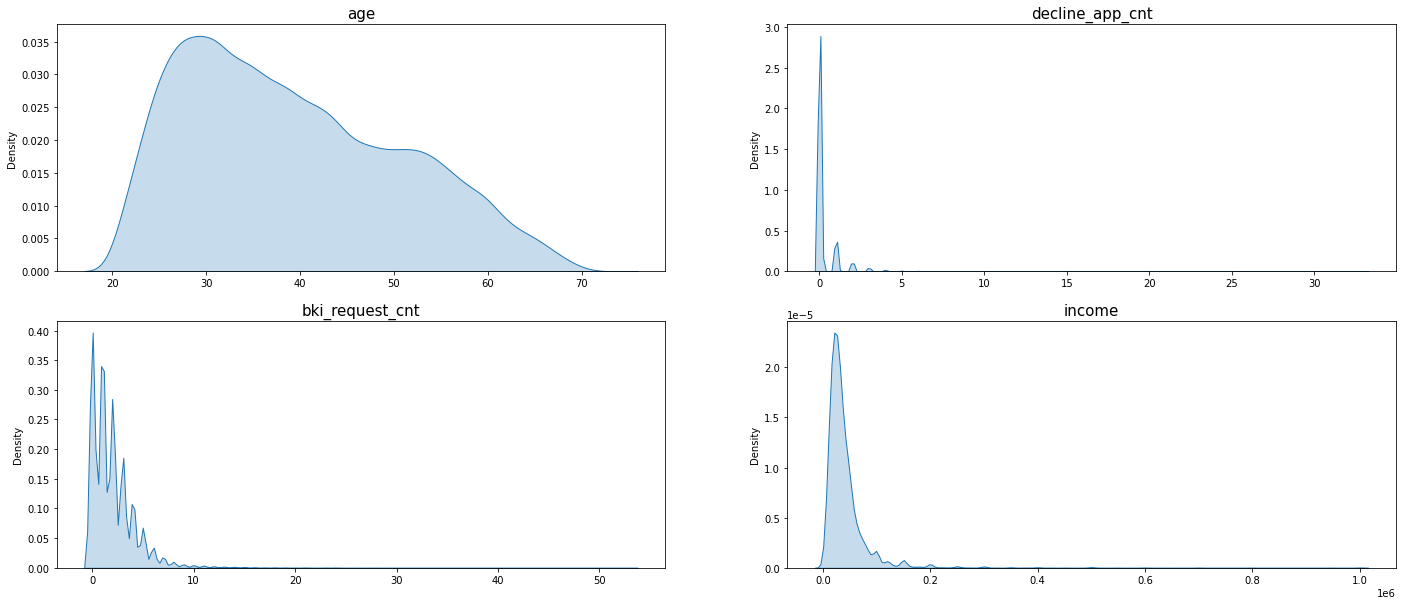

In [26]:
plt.figure(figsize=(24,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,2, i+1)
    plt.title(col, fontsize=15)
    sns.kdeplot(x=col, data=train, shade=True)
    plt.xlabel(None) 

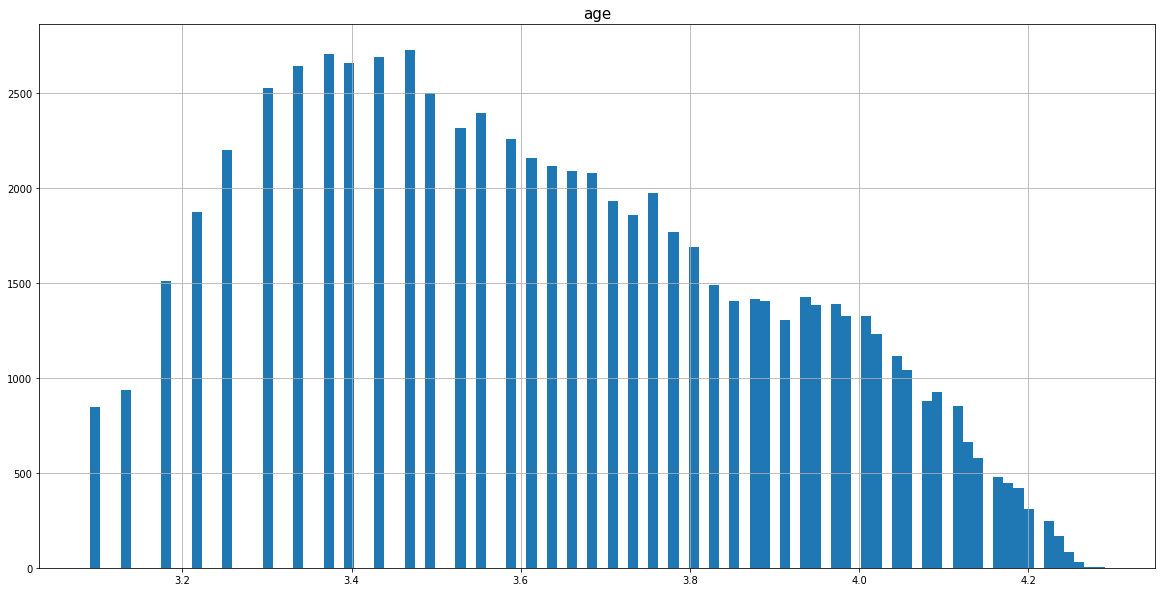

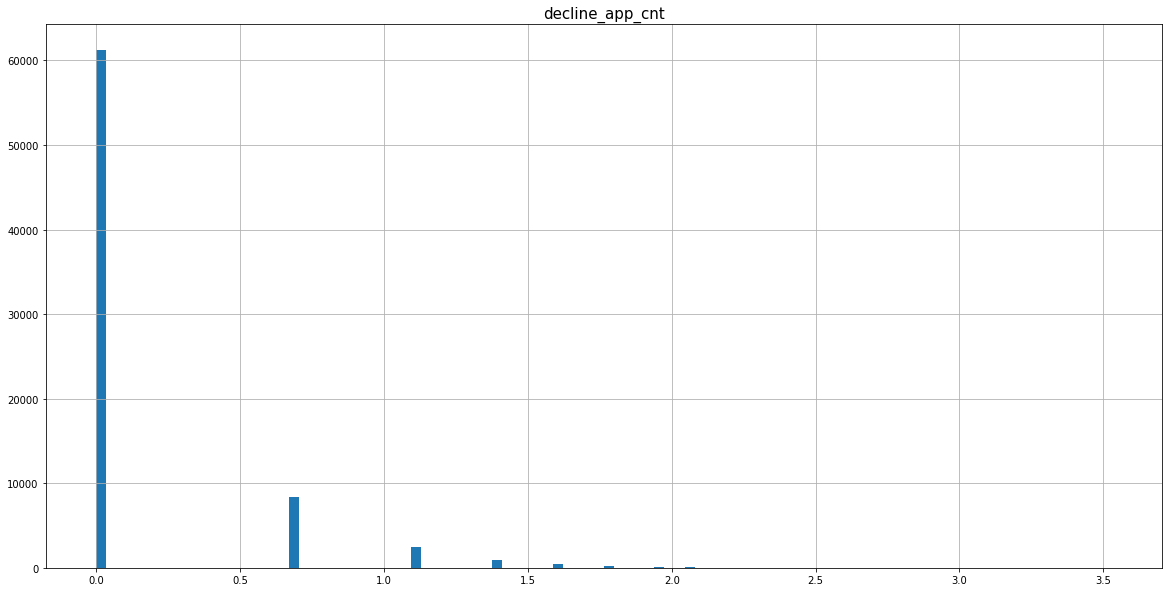

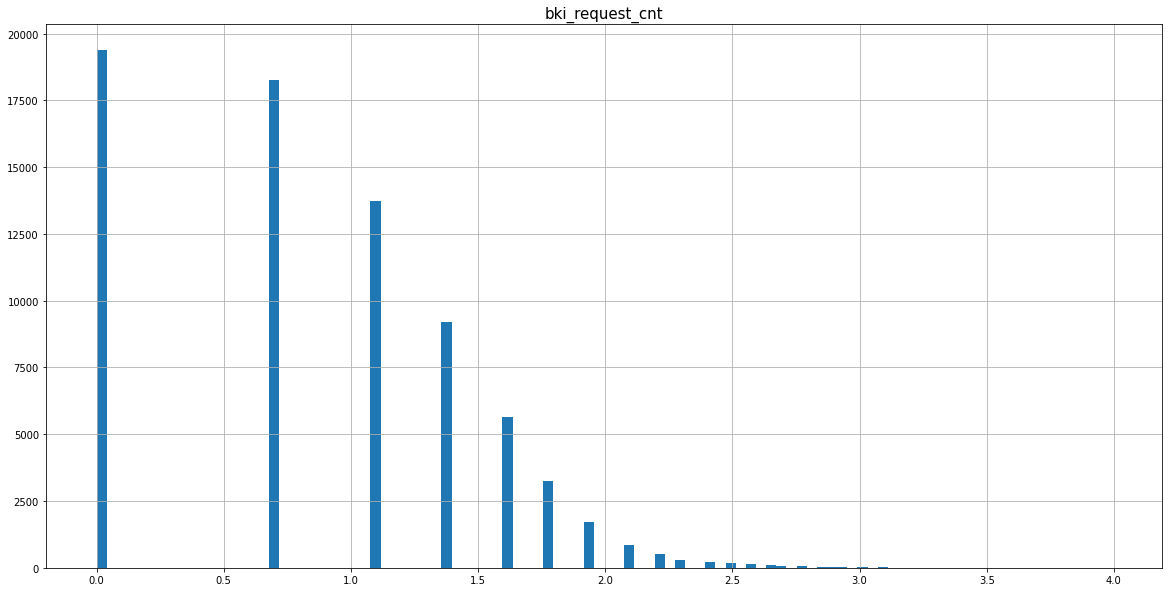

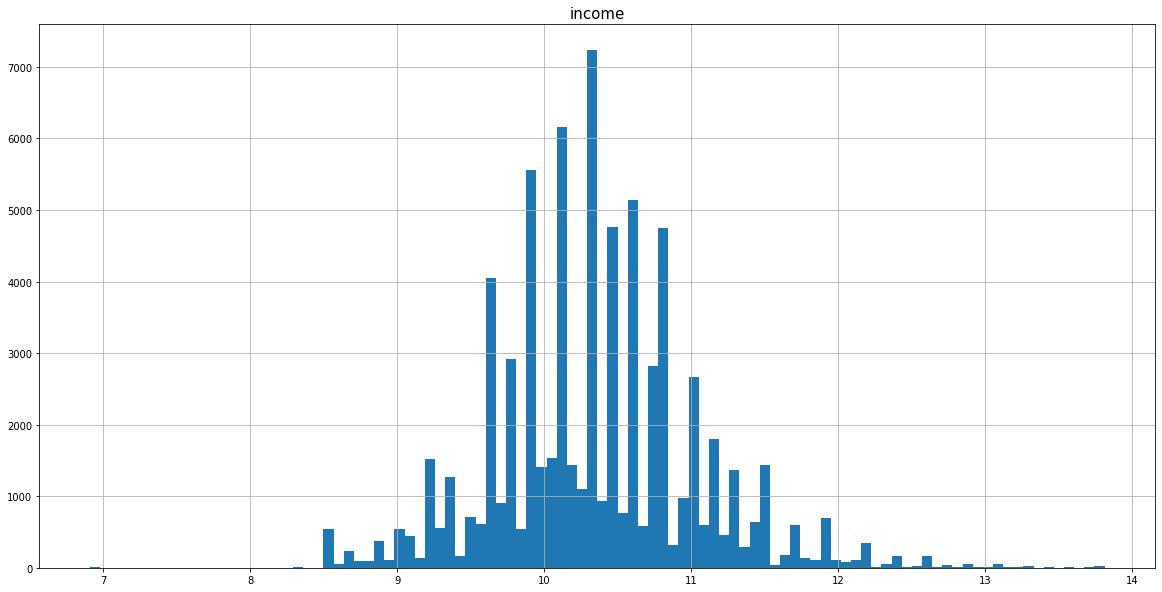

In [31]:
# прологарифмировать переменные 
plt.figure(figsize=(24,10))
for col in num_cols:
    np.log(data[col] + 1).hist(bins = 100, figsize = (20, 10))
    plt.title(col, fontsize=15)
    plt.show()

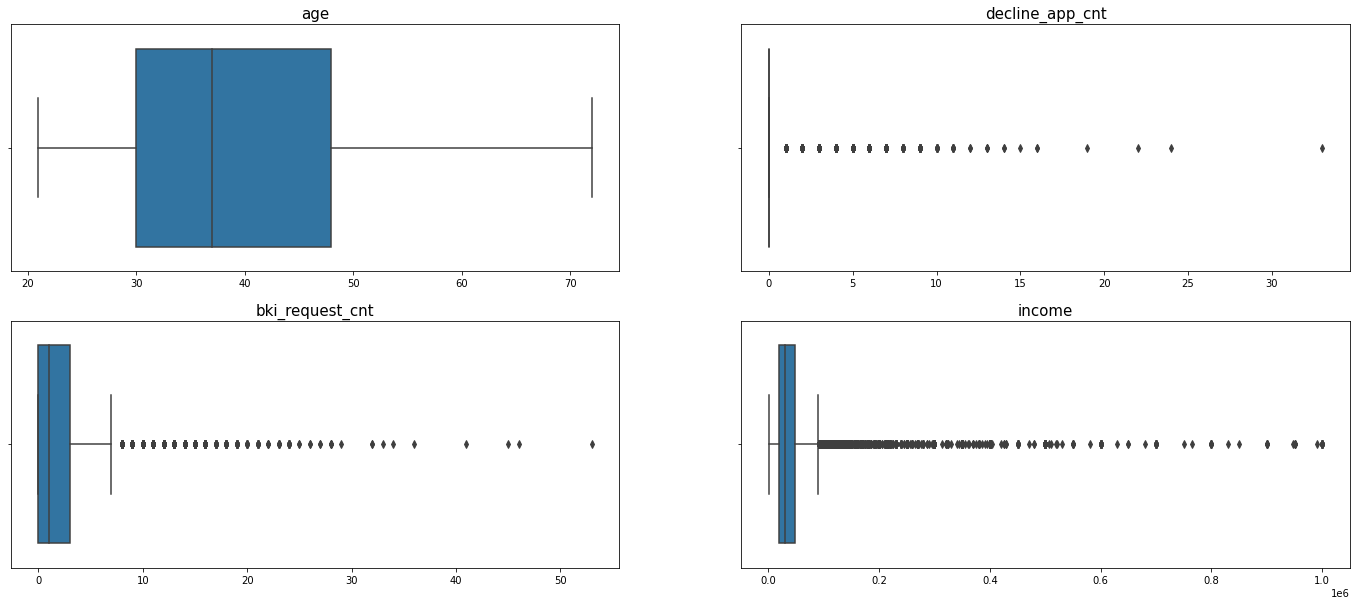

In [32]:
# построим бокс плоты для числовых признаков
plt.figure(figsize=(24,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,2, i+1)
    plt.title(col, fontsize=15)
    sns.boxplot(x=col, data=data)
    plt.xlabel(None)

In [39]:
data[data['default']==1].head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
18,26038,GRD,F,36,N,N,0,0,4,1,3,60000,N,1
23,51615,SCH,M,27,Y,Y,0,0,1,2,3,55000,N,1
24,35287,SCH,F,26,N,N,0,0,1,1,2,26000,N,1
32,53675,GRD,M,62,N,N,0,0,0,2,3,14800,N,1
44,48805,SCH,F,38,N,N,0,0,5,2,3,75000,N,1


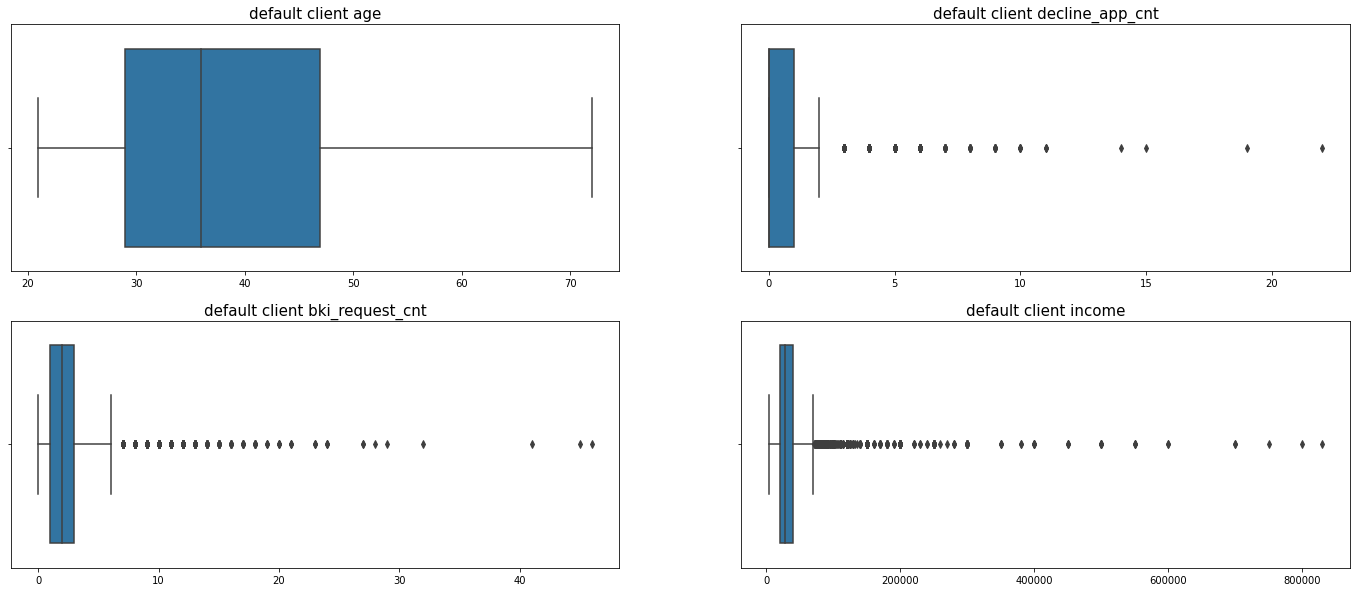

In [37]:
# построим бокс плоты для числовых признаков по дефолтным клиентам
plt.figure(figsize=(24,10))
for i, col in enumerate(num_cols):
    plt.subplot(2,2, i+1)
    plt.title('default client ' + col, fontsize=15)
    sns.boxplot(x=col, data=data[data['default']==1])
    plt.xlabel(None)

<AxesSubplot:>

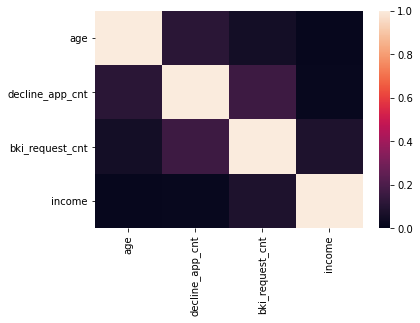

In [40]:
# оассмотрим корреляцию переменных
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)